In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Create a image that represents the lidar reflection of the parking spot 

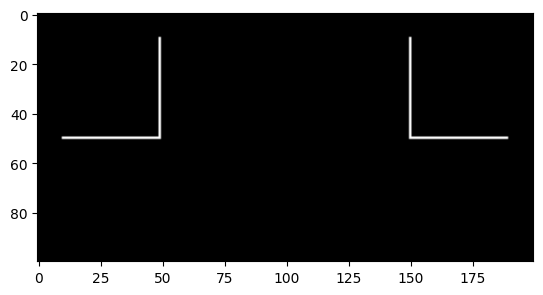

In [12]:
lidar_source_image = np.zeros((100, 200))
lidar_source_image[50, 10:50] = 1
lidar_source_image[50, 150:190] = 1
lidar_source_image[10:50, 49] = 1
lidar_source_image[10:50, 150] = 1

plt.imshow(lidar_source_image, cmap='gray')

In [13]:
def lidar_scan(origin, angle=0):
    lidar = []
    for angle in range(360):
        # get the distance to the first white pixel in the polar direction
        x = origin[0]
        y = origin[1]

        bounds = False

        while True:
            if x <= 0 or y <= 0 or x >= lidar_source_image.shape[1] or y >= lidar_source_image.shape[0]:
                bounds = True
                break

            if lidar_source_image[int(y), int(x)] == 1:
                break

            x += math.cos(math.radians(angle))
            y += math.sin(math.radians(angle))

        distance = math.sqrt((int(x) - origin[0]) ** 2 + (int(y) - origin[1]) ** 2)
        if bounds:
            distance = np.inf

        lidar.append(distance)

    return lidar

In [14]:
def plot_lidar_scan(lidar_points, show=False):
    plt.polar(np.arange(360) * np.pi / 180, lidar_points, 'ro')
    if show:
        plt.show()


# get the distance to these angles from a "known" position and draw them as distances and points

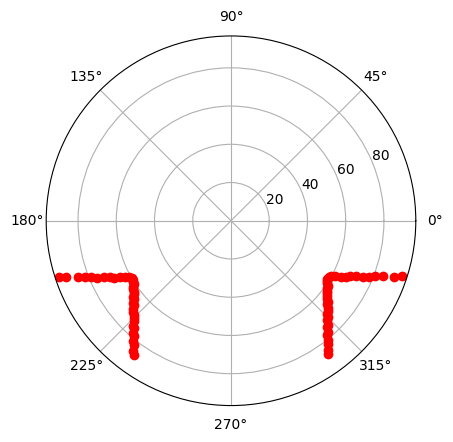

In [15]:
max_range = 400
origin = (100, 80)

lidar_points = lidar_scan(origin)
plot_lidar_scan(lidar_points)

get it form 2 differnt positions. one inside the parking spot and one off to the side of the spot

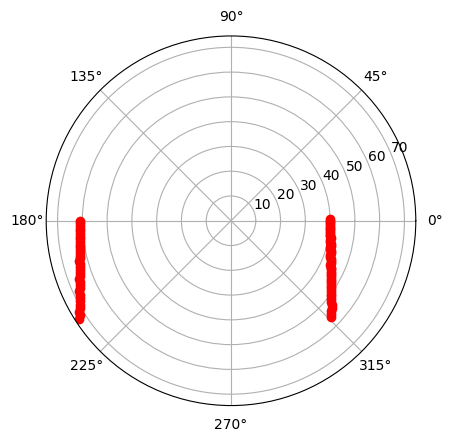

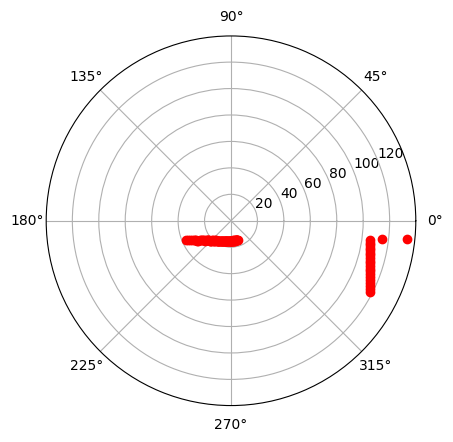

In [149]:
plot_lidar_scan(lidar_scan((110, 50)), True)  # inside

lidar_points = lidar_scan((45, 65))
plot_lidar_scan(lidar_points)  # off to the side

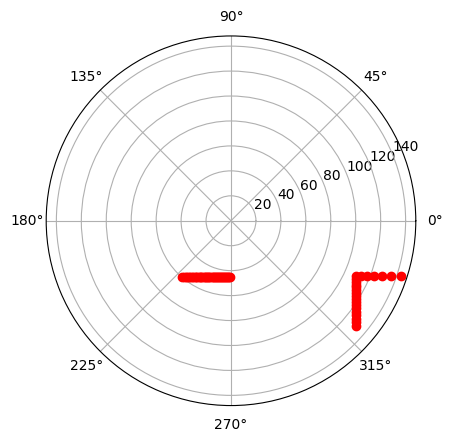

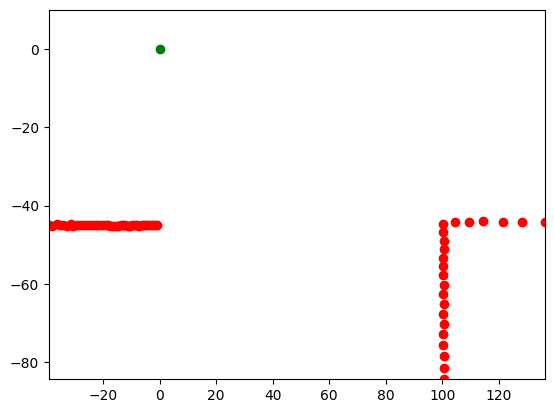

In [107]:
def get_polar_coords(lidar_scan):
    return [(distance, angle) for angle, distance in enumerate(lidar_scan) if distance != np.inf]


def get_relative_coords(polar_coords):
    return [(distance * math.cos(math.radians(angle)), distance * math.sin(math.radians(angle))) for distance, angle in
            polar_coords]


polar_coords = get_polar_coords(lidar_points)
plt.polar([math.radians(angle) for distance, angle in polar_coords], [distance for distance, angle in polar_coords],
          'ro')
plt.show()


def plot_relative_coords(coords):
    plt.plot([x for x, y in relative_coords], [y for x, y in relative_coords], 'ro')

    max_x = max([x for x, y in relative_coords] + [10])
    min_x = min([x for x, y in relative_coords] + [-10])
    max_y = max([y for x, y in relative_coords] + [10])
    min_y = min([y for x, y in relative_coords] + [-10])

    plt.scatter(0, 0, c='g')

    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)


relative_coords = get_relative_coords(polar_coords)
plot_relative_coords(relative_coords)



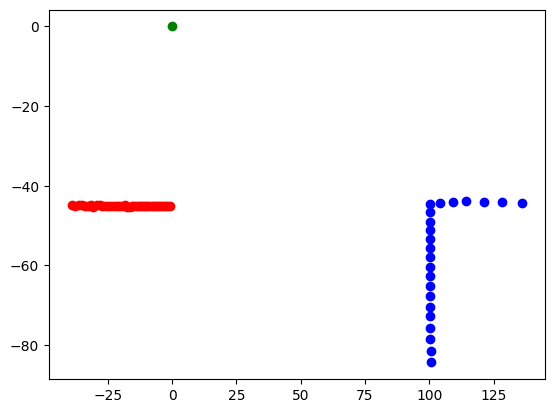

In [159]:
# cluster the points
from sklearn.cluster import DBSCAN

coords = np.array(relative_coords)
clusters = DBSCAN(eps=2, min_samples=2).fit(coords)
# plt.scatter(coords[:, 0], coords[:, 1], c=clusters.labels_)
# plt.scatter(0, 0, c='g')
# plt.show()

points_clusters = {}
for i, cluster in enumerate(clusters.labels_):
    if cluster not in points_clusters:
        points_clusters[cluster] = []
    points_clusters[cluster].append(coords[i])
    
# draw the point clusters. all in a different colour
colors = ['ro', 'bo', 'go', 'yo', 'co', 'mo']
for cluster in points_clusters.values():
    plt.plot([x for x, y in cluster], [y for x, y in cluster], colors.pop(0))
    
plt.scatter(0, 0, c='g')
    
plt.show()

In [ ]:
from math import sqrt

# plan all angles and distances
steering_angle = 16  # deg
steering_radius = 5.75 # m

wheelbase = 1.07 # m
front_overhang = 0.57 # m
rear_overhang = 0.25 # m
vehicle_length = wheelbase + front_overhang + rear_overhang # m
vehicle_width = 1.325 # m

parking_spot_width = 2 # m
parking_spot_length = 4 # m

def calculate_parking_dimensions(L, W, Lf, Lr, Rmin):
    """
    Calculate the minimum parking spot dimensions for a single maneuver.

    Parameters:
    L (float): Wheelbase of the vehicle[^2^][2].
    W (float): Width of the vehicle.
    Lf (float): Front overhang of the vehicle.
    Lr (float): Rear overhang of the vehicle.
    Rmin (float): Minimum turning radius of the vehicle.

    Returns:
    tuple: Minimum length and width of the parking spot[^1^][1].
    """
    # Calculate the minimum length of the parking spot
    S0 = math.sqrt(((L + Lf) / 2 + Rmin + W / 2)**2 / Rmin) + Lr

    # Calculate the minimum width of the parking spot
    S2 = math.sqrt((Rmin + W / 2)**2 + Lr**2) - W / 2

    return S0, S2

calculate_parking_dimensions(vehicle_length, vehicle_width, front_overhang, rear_overhang, steering_radius)